In [3]:
%matplotlib inline

In [ ]:
import os
import json
import csv
import matplotlib
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

In [6]:
def preData():
    review_abspath = os.path.abspath("../data/reviews.csv")
    user_abspath = os.path.abspath("../data/user.csv")
    df_reviews = pd.read_csv(review_abspath)
    df_users = pd.read_csv(user_abspath)

    df_reviews['year-month'] = df_reviews['date'].apply(lambda x: '-'.join(x.split('-')[0:2])) 
    avgrate_count_month= df_reviews.groupby('year-month').agg({'stars':[np.mean,np.size]})
    avgrate_count_month[('stars','mean*size')] = avgrate_count_month[('stars','mean')] * avgrate_count_month[('stars','size')]
    avgrate_count_month.reset_index(inplace=True)
    avgrate_count_month.columns = ['date','avg_stars', 'review_count', 'review_multiply']

    user_count_month = df_users['yelping_since'].value_counts().to_frame().sort_index()
    user_count_month.reset_index(inplace=True)
    user_count_month.columns = ['date', 'new_user']

    df_user_review = user_count_month.merge(avgrate_count_month,how='outer').sort_values(by='date').fillna(0)
    df_user_review['date'] = df_user_review['date'].apply(lambda x: datetime.strptime(x, "%Y-%m"))

    return df_user_review

def plot_result():
    df_user_review = preData()

    X = df_user_review['date'].values
    Y_review_count = df_user_review.review_count.values
    Y_user_count = df_user_review.new_user.values

    # create a figure
    sns.set_style("darkgrid")
    fig= plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(111)
    x_axis = np.arange(len(X))
    
    # ax1: Date - Review Count 
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    yearsFmt = mdates.DateFormatter('%Y')
    locator = mdates.AutoDateLocator()
    autoFmt = mdates.AutoDateFormatter(locator)

    lns1=ax1.plot(X, Y_review_count, color = 'r',linewidth=1.0, linestyle="-",label='review')
    ax1.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: format(int(y), ',')))
    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(autoFmt)
    ax1.set_title('Comparsion new User Count - review Count',x =0.5, y = 0.92, fontsize=35)
    ax1.set_xlabel('Date',fontsize=20)
    ax1.set_ylabel('Review Count',fontsize=20)
    ax1.margins(0.02)

    # ax2: Date - new User Count
    ax2 = ax1.twinx()
    lns2=ax2.plot(X, Y_user_count, color = 'g',linewidth=1.0, linestyle="-",label='user')
    ax2.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: format(int(y), ',')))
    ax2.set_ylabel('New User Count',fontsize=15)
    # ax2.set_ylim([0,15000])
    ax2.margins(0.02)

    # show result
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0,fontsize=20)
    sns.despine(right=False)
    plt.show()


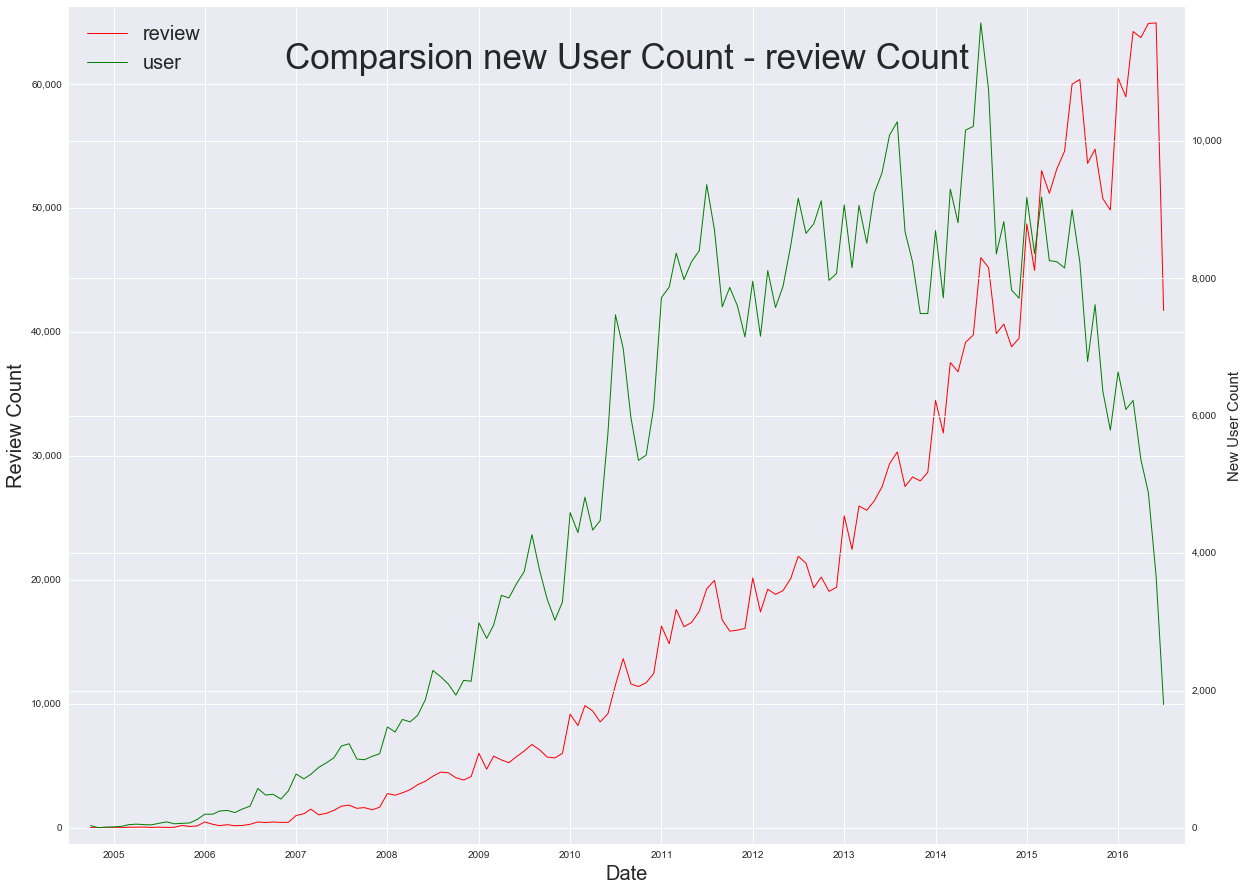

In [7]:
# run 
plot_result()